# Correlation and Autocorrelation

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

jtplot.style(figsize=(15, 9))

In [3]:
diet = pd.read_csv('https://raw.githubusercontent.com/goodboychan/goodboychan.github.io/main/_notebooks/dataset/diet.csv',
                   parse_dates=True, index_col=0)
diet.head()

,diet
Date,
2011-06-26,70
2011-07-03,71
2011-07-10,73
2011-07-17,74
2011-07-24,72


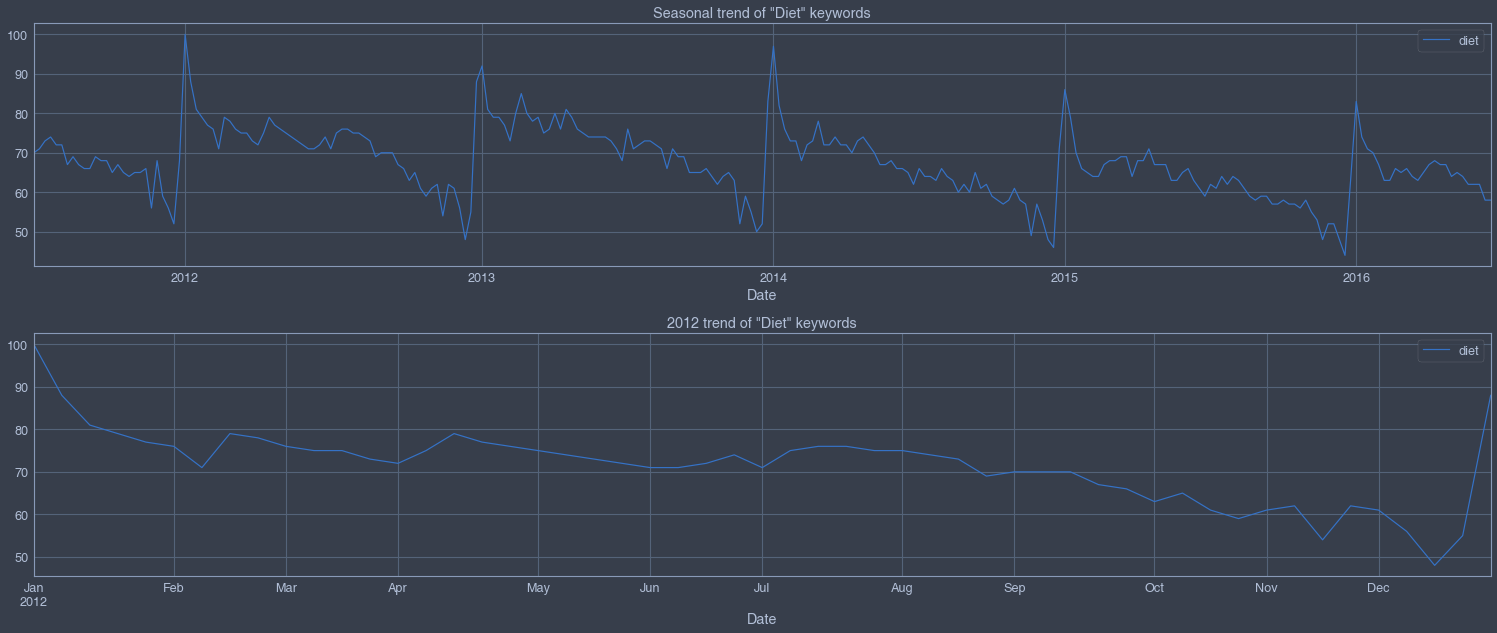

In [13]:
fig, ax = plt.subplots(2, 1, figsize=(21, 9))

diet.plot(grid=True, ax=ax[0]);
ax[0].set_title('Seasonal trend of "Diet" keywords');

diet2012 = diet[diet.index.year==2012]

diet2012.plot(grid=True, ax=ax[1]);
ax[1].set_title('2012 trend of "Diet" keywords');

fig.tight_layout()

## Correlation of Two Time Series

In [2]:
stocks = pd.read_csv('https://raw.githubusercontent.com/goodboychan/goodboychan.github.io/main/_notebooks/dataset/stocks.csv',
                     parse_dates=True, index_col=0)
bonds = pd.read_csv('https://raw.githubusercontent.com/goodboychan/goodboychan.github.io/main/_notebooks/dataset/bonds.csv',
                    parse_dates=True, index_col=0)

In [3]:
stocks_and_bonds = stocks.join(bonds, how='inner')
stocks_and_bonds.head()

,SP500,US10Y
observation_date,,
2007-06-11,1509.12,5.14
2007-06-12,1493.00,5.26
2007-06-13,1515.67,5.20
2007-06-14,1522.97,5.23
2007-06-15,1532.91,5.16


Correlation of stocks and interest rates: 0.4128148129154817


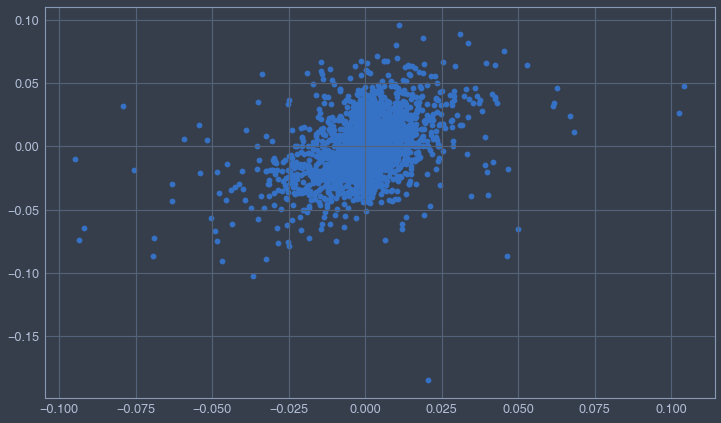

In [7]:
returns = np.log(stocks_and_bonds / stocks_and_bonds.shift(1))

correlation = returns['SP500'].corr(returns['US10Y'])
print(f'Correlation of stocks and interest rates: {correlation}')

plt.scatter(returns['SP500'], returns['US10Y']);

<AxesSubplot:xlabel='observation_date'>

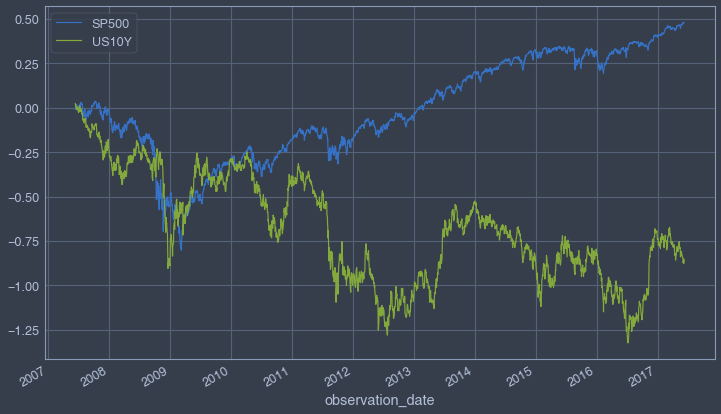

In [8]:
returns.cumsum().plot()

### UFO

In [7]:
DJI = pd.read_csv('https://raw.githubusercontent.com/goodboychan/goodboychan.github.io/main/_notebooks/dataset/DJI.csv',
                  parse_dates=True, index_col=0)
DJI.columns = ['DJI']
DJI.head()

,DJI
Date,
1941-01-01,110.96
1942-01-01,119.40
1943-01-01,135.89
1944-01-01,152.32
1945-01-01,192.91


In [8]:
UFO = pd.read_csv('https://raw.githubusercontent.com/goodboychan/goodboychan.github.io/main/_notebooks/dataset/UFO.csv',
                  parse_dates=True, index_col=0)
UFO.columns = ['UFO']
UFO.head()

,UFO
Date,
1941-01-01,1
1942-01-01,2
1943-01-01,9
1944-01-01,9
1945-01-01,9


In [9]:
levels = UFO.join(DJI, how='inner')
levels.head()

,UFO,DJI
Date,,
1941-01-01,1,110.96
1942-01-01,2,119.40
1943-01-01,9,135.89
1944-01-01,9,152.32
1945-01-01,9,192.91


Text(0, 0.5, 'Dow Jones Average/Number of Sightings')

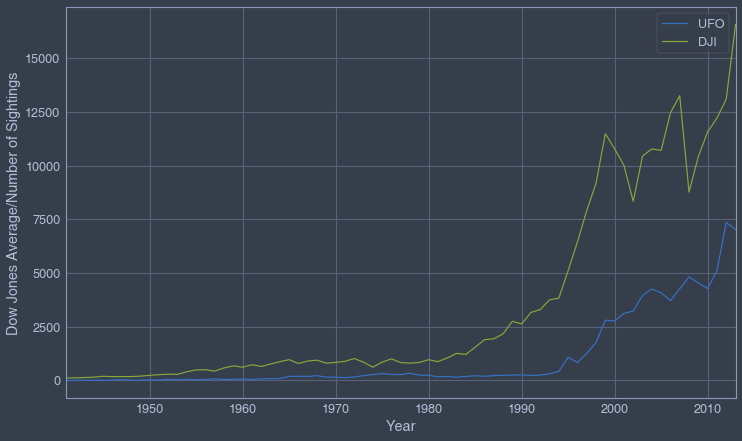

In [10]:
levels.plot(grid=True);
plt.xlabel('Year');
plt.ylabel('Dow Jones Average/Number of Sightings')

In [11]:
correlation1 = levels['DJI'].corr(levels['UFO'])
print("Correlation of levels: ", correlation1)

changes = levels.pct_change()
correlation2 = changes['DJI'].corr(changes['UFO'])
print("Correlation of changes: ", correlation2)

Correlation of levels:  0.9399762210726428
Correlation of changes:  0.060269354624053716


## Simple Linear Regression

#### Relationship between R-Squared and Correlation

$\displaystyle
[corr(x, y)]^2=R^2
\\
sign(corr)=sign(regression\,slope)
$

In [22]:
df_x = pd.read_csv('https://raw.githubusercontent.com/goodboychan/goodboychan.github.io/main/_notebooks/dataset/x.csv',
                   index_col=0, header=None)
df_y = pd.read_csv('https://raw.githubusercontent.com/goodboychan/goodboychan.github.io/main/_notebooks/dataset/y.csv',
                   index_col=0, header=None)

df_x.columns = ['x']
df_y.columns = ['y']

x = df_x.reset_index(drop=True)['x']
y = df_y.reset_index(drop=True)['y']

In [23]:
correlation = x.corr(y)
print(f'The correlation between x and y is {correlation:4.2f}' % ())

dfx = pd.DataFrame(x, columns=['x'])
dfx1 = sm.add_constant(dfx)
result = sm.OLS(y, dfx1).fit()

print(result.summary())

The correlation between x and y is -0.90
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     4471.
Date:                Wed, 21 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:13:53   Log-Likelihood:                -560.10
No. Observations:                1000   AIC:                             1124.
Df Residuals:                     998   BIC:                             1134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

f:\python\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Autocorrelation

In [2]:
MSFT = pd.read_csv('https://raw.githubusercontent.com/goodboychan/goodboychan.github.io/main/_notebooks/dataset/MSFT.csv',
                   parse_dates=True, index_col=0)
MSFT.head()

,Adj Close
Date,
2012-08-06,26.107651
2012-08-07,26.377876
2012-08-08,26.438896
2012-08-09,26.587088
2012-08-10,26.517351


In [3]:
MSFT = MSFT.resample(rule='W').last()

returns = np.log(MSFT / MSFT.shift(1))

autocorrelation = returns['Adj Close'].autocorr()
print(f'The auto correlation of weekly returns is {autocorrelation:4.2f}')

The auto correlation of weekly returns is -0.16


In [4]:
daily_rates = pd.read_csv('https://raw.githubusercontent.com/goodboychan/goodboychan.github.io/main/_notebooks/dataset/daily_rates.csv',
                          parse_dates=True, index_col=0)
daily_rates.head()

,US10Y
DATE,
1962-01-02,4.06
1962-01-03,4.03
1962-01-04,3.99
1962-01-05,4.02
1962-01-08,4.03


In [5]:
daily_diff = daily_rates.diff()

autocorrelation_daily = daily_diff['US10Y'].autocorr()
print(f'The autocorrelation of daily interest rate changes is {autocorrelation_daily:4.2f}')

# Convert the daily data to annual data
yearly_rates = daily_rates.resample(rule='A').last()

yearly_diff = yearly_rates.diff()
autocorrelation_yearly = yearly_diff['US10Y'].autocorr()
print(f'The autocorrelation of annual interest rate changes is {autocorrelation_yearly:4.2f}')

The autocorrelation of daily interest rate changes is 0.07
The autocorrelation of annual interest rate changes is -0.22
